In [2]:
from neural.recorder import (Recorder, CUDARecorder, NumpyRecorder, ScalarRecorder)
from neural.network import Container, Input
from neural import utils
from neural.model.neuron import LeakyIAF

In [3]:
from neural import cuda_available

In [4]:
from neural import Model

In [5]:
class DummyModel(Model):
    Default_Params=dict()
    Default_States=dict(x=0.)
    
    def ode(self, inp=0.):
        self.x = inp

In [6]:
dt, dur, start, stop, num, amp = 1e-4, 2, 0.5, 1.0, 1, 100.
inp = Input(num=None, name='input')
spikes = utils.generate_stimulus('spike', dt, dur, (start, stop), amp)

In [10]:
import numpy as np
dt, dur, start, stop = 1e-4, 2, 0.5, 1.0
num = 100
amps = np.linspace(10, 100, num)
spikes = utils.generate_stimulus('spike', dt, dur, (start, stop), amps)
mdl = Container(DummyModel(), name='dummy', num=len(amps))
mdl.record('x')

In [13]:
from neural.network import Network

In [14]:
nn = Network()

mdl = nn.add(DummyModel, num=len(amps), name='dummy')

In [23]:
?mdl.obj.reset

Signature: mdl.obj.reset(**kwargs) -> None
Docstring:
reset state and intermediate variables to their initial condition.

Notes:
    This function is a wrapper to the underlying `_reset`.
File:      /mnt/server-home/tingkai/Project/neural/neural/basemodel.py
Type:      method


In [22]:
mdl.obj.x

0.0

In [19]:
mdl.obj.x

0.0

In [11]:
mdl.obj.x

0.0

In [9]:
import numpy as np
dt, dur, start, stop = 1e-4, 2, 0.5, 1.0
num = 100
amps = np.linspace(10, 100, num)
spikes = utils.generate_stimulus('spike', dt, dur, (start, stop), amps)
mdl = Container(DummyModel(), name='dummy', num=len(amps))
mdl.record('x')
rec = mdl.set_recorder(steps=spikes.shape[-1], rate=1)
for tt, ss in enumerate(spikes.T):
    mdl.obj.update(dt, inp=ss)
    rec.update(index=tt)

> /mnt/server-home/tingkai/Project/neural/neural/recorder.py(25)__new__()
-> if cls is Recorder:
['x']
> /mnt/server-home/tingkai/Project/neural/neural/recorder.py(26)__new__()
-> attr = getattr(obj, attrs[0])
> /mnt/server-home/tingkai/Project/neural/neural/recorder.py(27)__new__()
-> if isinstance(attr, Number):
0.0


BdbQuit: 

In [7]:
inp(spikes)

In [9]:
scalar_mdl = Container(DummyModel(), name='dummy', num=1)
scalar_mdl.record('x')
scalar_rec = scalar_mdl.set_recorder(steps=spikes.shape[0], rate=1)

In [10]:
for tt, ss in enumerate(spikes):
    scalar_mdl.obj.update(dt, inp=ss)
    scalar_rec.update(index=tt)

In [19]:
import numpy as np

In [20]:
np.testing.assert_equal(scalar_rec.x, spikes)

In [14]:
if 'spikes_g' not in globals():
    spikes_g = garray.to_gpu(spikes)
cuda_mdl = Container(DummyModel(), name='dummy', num=1, backend='cuda')
cuda_mdl.record('x')
cuda_rec = mdl.set_recorder(steps=spikes_g.shape[0], rate=1)

NameError: name 'garray' is not defined

In [12]:

for tt, ss in enumerate(spikes):
    mdl.obj.update(dt, inp=ss)
    rec.update(index=tt)

In [13]:
rec

In [19]:
mdl = Model(name='test', num=10)

AttributeError: Unexpected variable 'name'

In [2]:
lif = Container(LeakyIAF(), name='hhn', num=100)

In [3]:
lif.record('s')

Attribute s not found in <neural.model.neuron.LeakyIAF object at 0x7f8ff4221390>, skipping


In [ ]:
lif.set_recorder()

In [15]:
lif.recorder

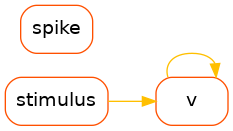

In [13]:
from IPython.display import Image
Image(lif.obj.to_graph(local=True))

['spike']